In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()
class_names = ['T-shirt', 'Trouser', 'Jumper', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
train_images.shape
train_labels
test_images.shape

(10000, 28, 28)

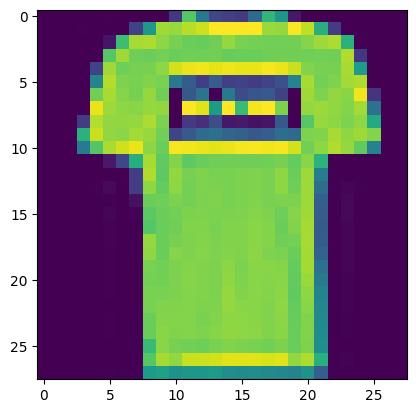

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

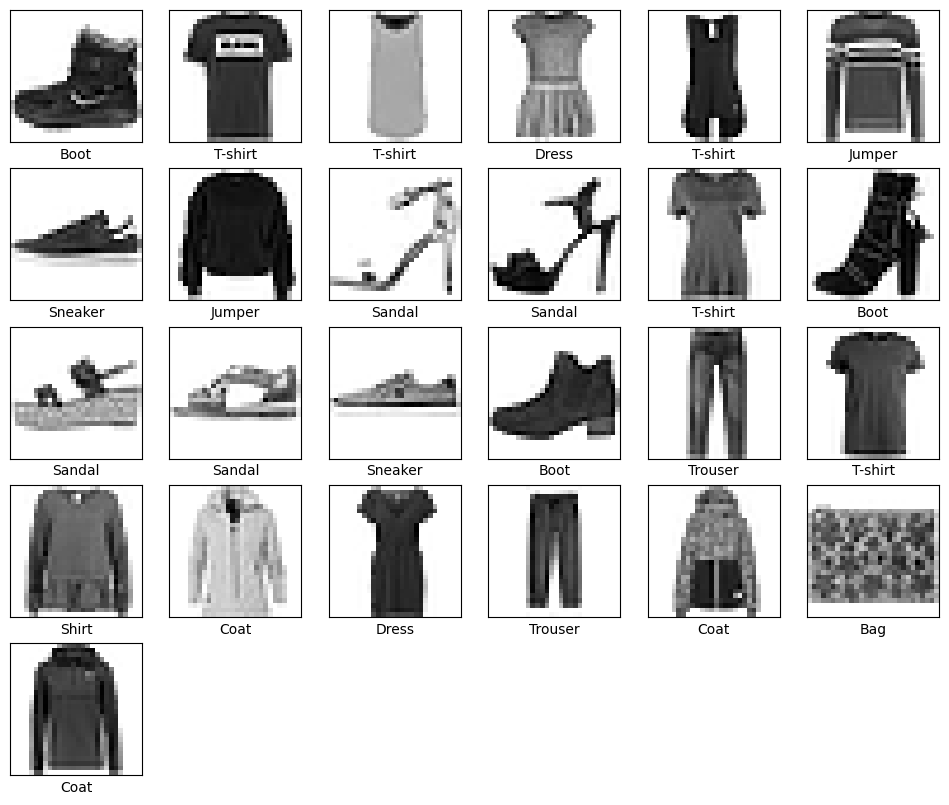

In [35]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 15)


Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4971 - accuracy: 0.8252
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3732 - accuracy: 0.8648
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3330 - accuracy: 0.8794
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3096 - accuracy: 0.8862
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2919 - accuracy: 0.8923
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2781 - accuracy: 0.8971
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2664 - accuracy: 0.9017
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2569 - accuracy: 0.9042
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2466 - accuracy: 0.9077
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.236

In [ ]:
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)
print('\n TEST ACCURACY: ',test_acc)

313/313 - 1s - loss: 0.3371 - accuracy: 0.8864 - 669ms/epoch - 2ms/step

 TEST ACCURACY:  0.8863999843597412


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[1]



array([6.5949158e-04, 1.1570135e-12, 9.9836004e-01, 1.7339355e-10,
       9.6092175e-04, 3.0188154e-16, 1.9573716e-05, 7.7299247e-17,
       4.8493642e-10, 5.3895092e-16], dtype=float32)

In [ ]:
np.argmax(predictions[1])

2

In [ ]:
test_labels[1]

2

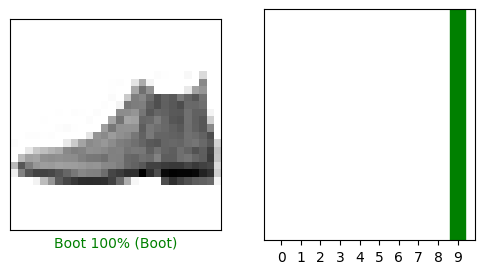

In [ ]:
def plot(i,predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

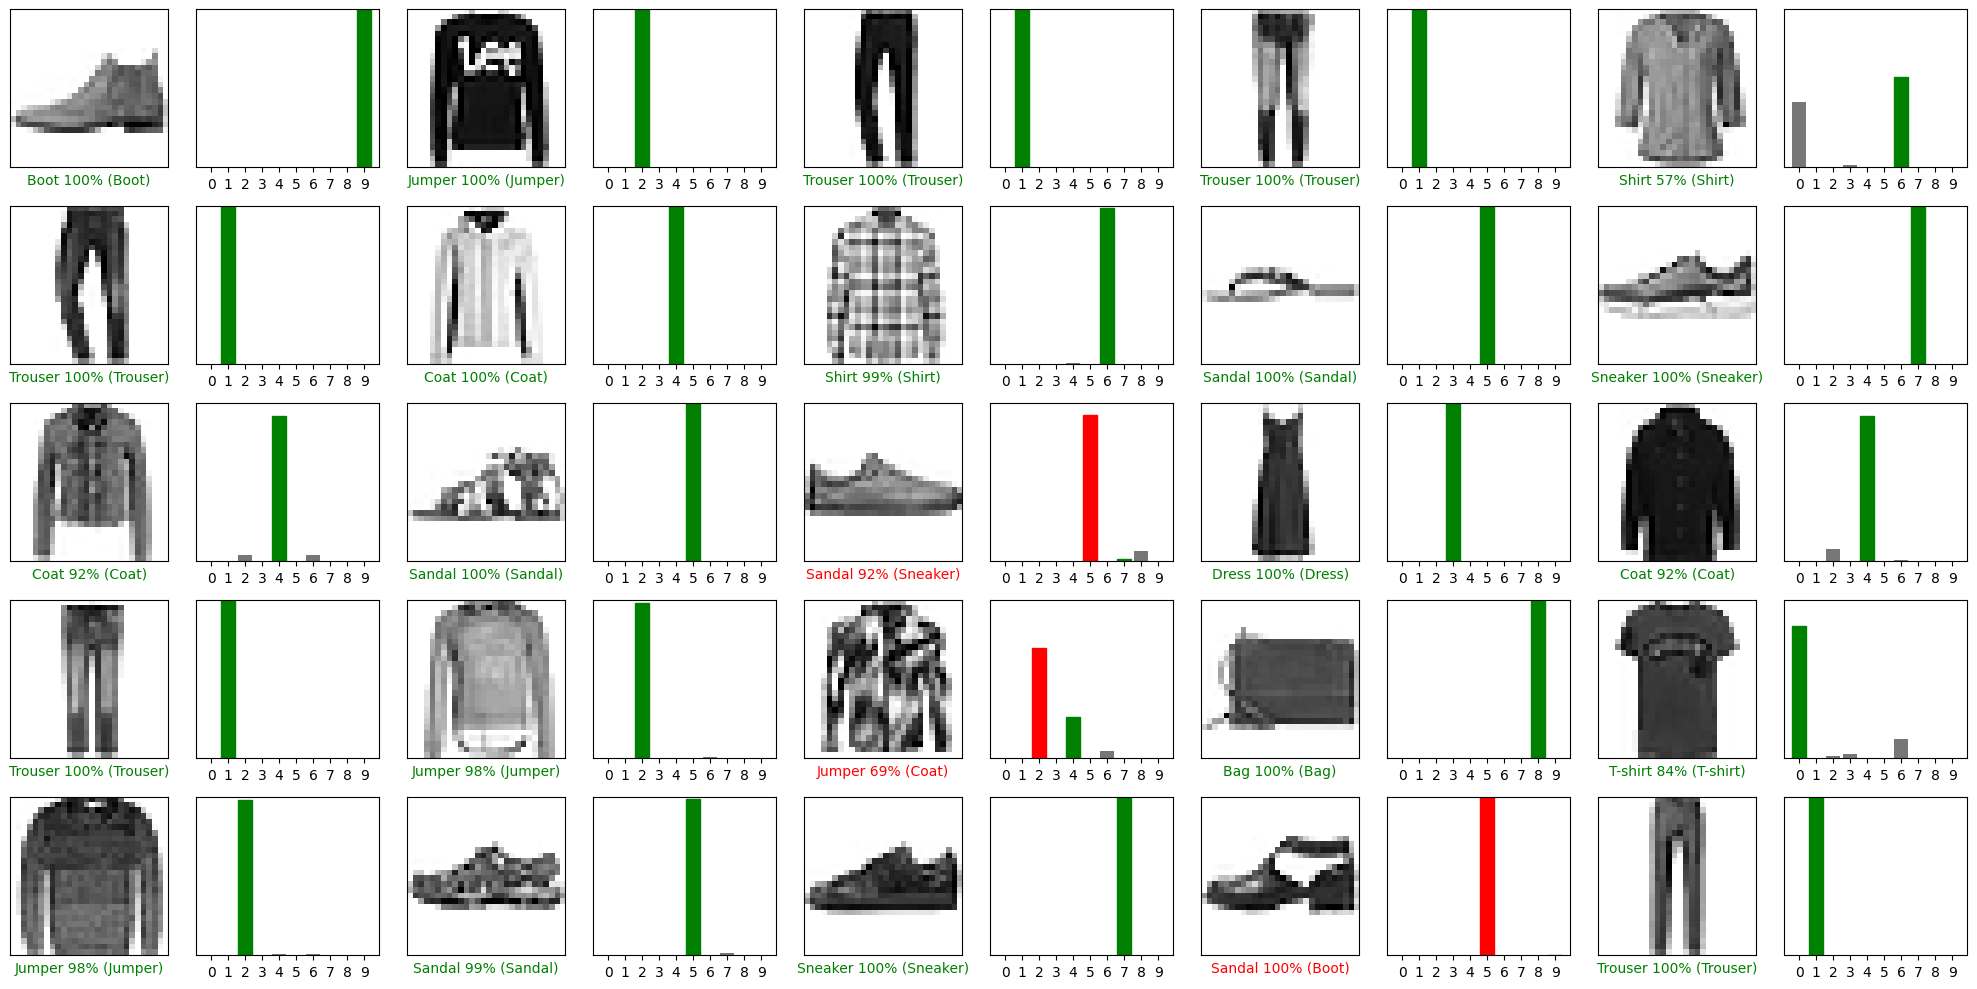

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [39]:
img = test_images[1]
img = (np.expand_dims(img,0))

predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


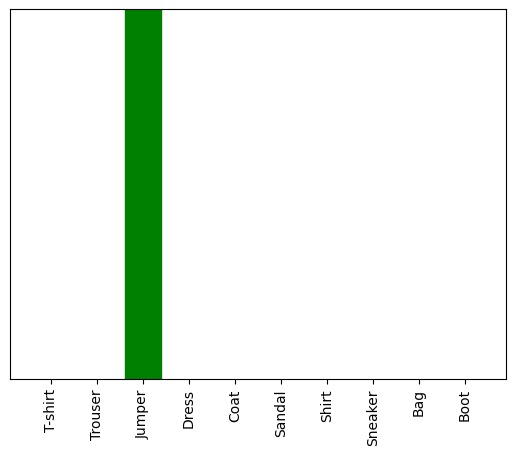

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()

In [42]:
np.argmax(predictions_single[0])

2